# **Customer Segmentation with K-Means Clustering**
**Dataset: https://www.kaggle.com/datasets/shwetabh123/mall-customers**

# **Importing Libraries**

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading DataSet**

In [209]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
47,48,Female,27,40,47
11,12,Female,35,19,99
109,110,Male,66,63,48
62,63,Female,67,47,52
121,122,Female,38,67,40


# **Data Preprocessing**

In [210]:
df.shape

(200, 5)

In [211]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [213]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [214]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**No Null Values present in Dataset**

In [215]:
df.duplicated().sum()

0

**No Duplicate Values present in Dataset**

In [216]:
df.drop(columns=['CustomerID'], inplace=True)

In [217]:
df = df.replace({
        'Male': 0,
        'Female': 1
})

In [218]:
df.sample(5)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
101,1,49,62,48
167,1,33,86,95
17,0,20,21,66
70,0,70,49,55
33,0,18,33,92


# **Visualization of Dataset**

<ipython-input-219-4936fe16c1f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


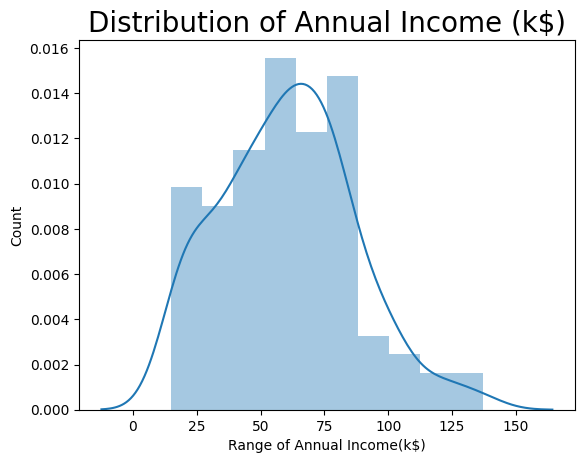

In [219]:
sns.distplot(df['Annual Income (k$)'])
plt.title("Distribution of Annual Income (k$)", fontsize=20)
plt.xlabel('Range of Annual Income(k$)')
plt.ylabel("Count")
plt.show()

<ipython-input-220-e7ba92f557a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


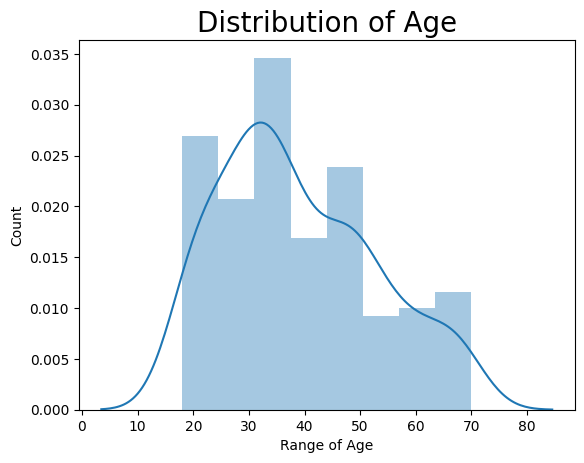

In [220]:
sns.distplot(df['Age'])
plt.title("Distribution of Age", fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel("Count")
plt.show()

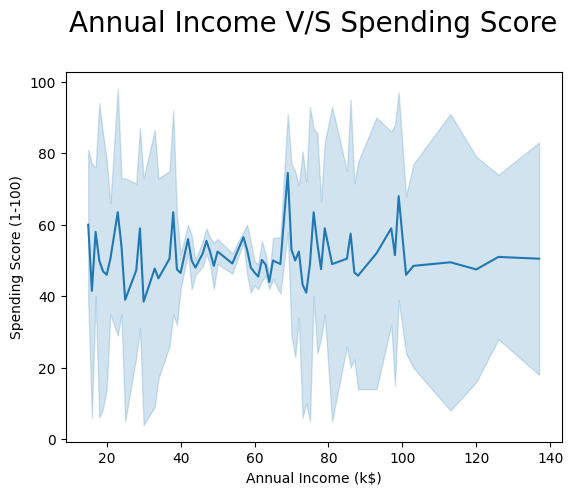

In [221]:
sns.lineplot(x='Annual Income (k$)', y='Spending Score (1-100)', data = df)
plt.title("Annual Income V/S Spending Score\n", fontsize=20)
plt.show()

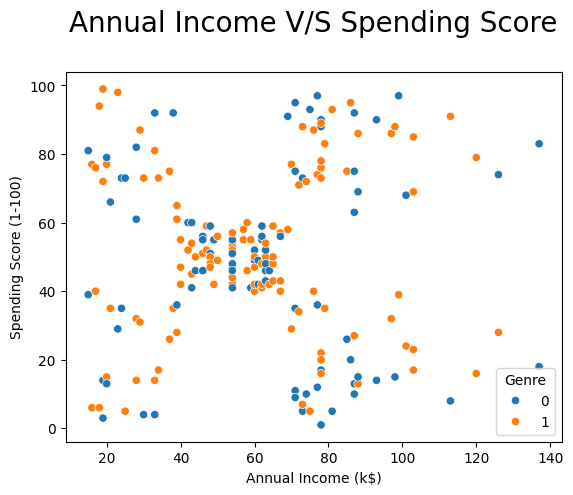

In [222]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data = df, hue='Genre')
plt.title("Annual Income V/S Spending Score\n", fontsize=20)
plt.show()

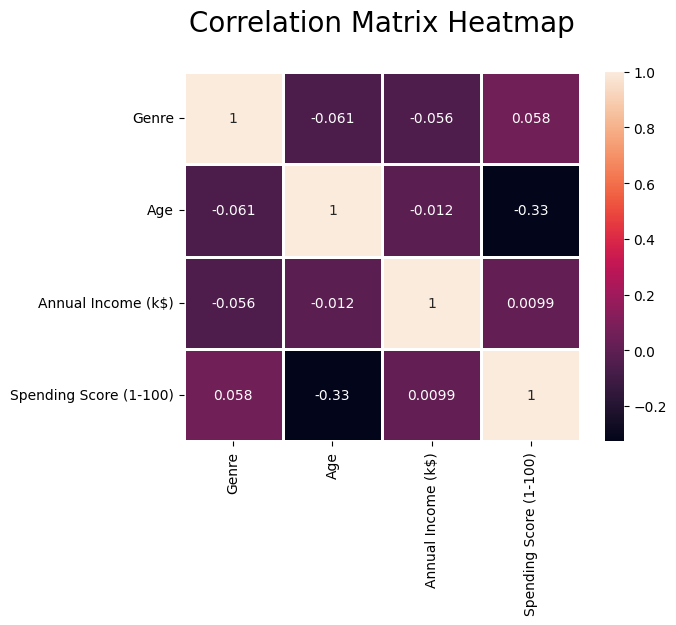

In [223]:
sns.heatmap(df.select_dtypes(include=['float64','int']).corr(), annot= True, linewidth=1)
plt.title('Correlation Matrix Heatmap\n', fontsize=20)
plt.show()

In [224]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.sample(5)

,Annual Income (k$),Spending Score (1-100)
138,74,10
68,48,59
165,85,75
42,39,36
111,63,54


# **Train_Test_Split**

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

In [226]:
X_train.head()

,Annual Income (k$),Spending Score (1-100)
169,87,63
97,60,50
31,30,73
12,20,15
35,33,81


In [227]:
X_test.head()

,Annual Income (k$),Spending Score (1-100)
95,60,52
15,20,79
30,30,4
158,78,1
128,71,11


# **Feature Scaling (standardization)**

In [228]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [229]:
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

# **Applying KMeans**

In [230]:
from sklearn.cluster import KMeans

# **Calculating Value of WCSS and ploting Elbow curve**

In [231]:
wcss = []

In [232]:
for i in range(1,11):
  km = KMeans(n_clusters = i)
  km.fit_predict(X_train_scaled)
  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [233]:
wcss

[280.0,
 184.29015456919987,
 110.90694017259398,
 74.96917235414034,
 45.5316279204132,
 37.78475007850458,
 31.48026321350017,
 25.701609062375482,
 23.084163722218328,
 19.795446718493857]

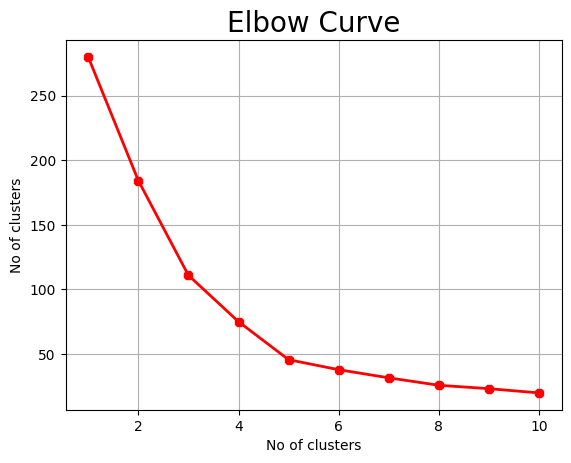

In [237]:
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve", fontsize=20)
plt.xlabel("No of clusters")
plt.ylabel("No of clusters")
plt.grid()
plt.show()

# **Elbow curve shows that No. of Clusters formed is equal to 5**

# **Implementing KMeans for 5 clusters**

In [240]:
km = KMeans(n_clusters = 5)
y_means = km.fit_predict(X)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

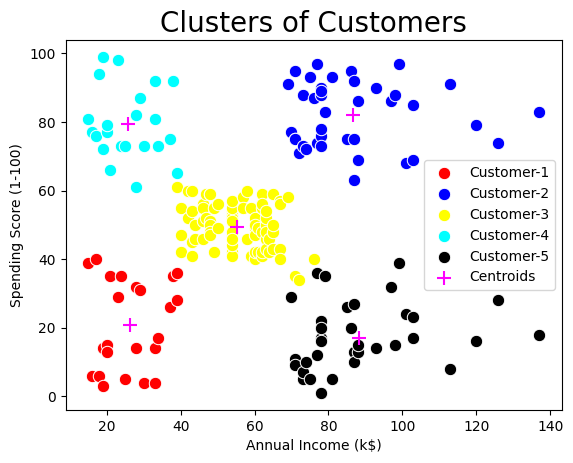

In [258]:
sns.scatterplot(x=X.iloc[y_means == 0, 0], y=X.iloc[y_means == 0, 1], s=80, c='red', label='Customer-1')
sns.scatterplot(x=X.iloc[y_means == 1, 0], y=X.iloc[y_means == 1, 1], s=80, c='blue', label='Customer-2')
sns.scatterplot(x=X.iloc[y_means == 2, 0], y=X.iloc[y_means == 2, 1], s=80, c='yellow', label='Customer-3')
sns.scatterplot(x=X.iloc[y_means == 3, 0], y=X.iloc[y_means == 3, 1], s=80, c='cyan', label='Customer-4')
sns.scatterplot(x=X.iloc[y_means == 4, 0], y=X.iloc[y_means == 4, 1], s=80, c='black', label='Customer-5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, c='magenta', label='Centroids', marker='+')
plt.title("Clusters of Customers", fontsize=20)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# **Conclusion**
**From the above Scatter Plot we conclude following points:**
*  Red cluster shows customers having less annual income as well as less spending score
*   Black cluster shows customers having more annual income but less spending score
*  Yellow cluster indicates customers having average annual income as well as average spending score
*  Cyan cluster shows customers having less annual income but more spending score
*  Blue cluster shows customers having more annual income as well as more spending score  